In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers


Bad key "text.kerning_factor" on line 4 in
/home/teguh/miniconda3/envs/tf3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [8]:
from scipy.stats import multivariate_normal as mvn

N = 50000
x_dim = 1
y_dim = 1
noise_std_true = 0.5


# Generate data
#The dataset 1 is unimodal, the dataset 2 is multimodal

dataset_nb = 1

if dataset_nb == 1:
    b_true = np.random.randn(y_dim).astype(np.float32)   
    w_true = np.random.randn(x_dim, y_dim).astype(np.float32) 
    x = np.linspace(-10., 100., N)[None].T
    x = np.float32(x)
    noise = noise_std_true * np.random.randn(N,y_dim).astype(np.float32)
    y = np.matmul((x-50)**2, w_true)/100. + b_true + noise
    
elif dataset_nb == 2:
    radius = np.abs(np.random.normal(loc=0., scale=1., size=(N//2,1)))
    theta = np.random.uniform(low=0., high=2*np.pi, size=(N//2,1))
    x1 = radius * np.cos(theta)
    y1 = radius * np.sin(theta)
    
    radius = np.abs(np.random.normal(loc=10., scale=1., size=(N//2,1)))
    theta = np.random.uniform(low=0., high=2*np.pi, size=(N//2,1))
    x2 = radius * np.cos(theta)
    y2 = radius * np.sin(theta)
    
    x = np.vstack([x1, x2])
    y = np.vstack([y1, y2])

In [9]:
samples = np.hstack([x,y])

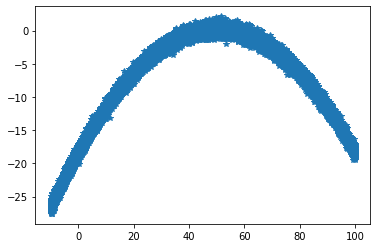

In [10]:
plt.plot(samples[:,0], samples[:,1], '*')

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
from tensorflow.keras.models import Model

In [22]:
input_dim = 2
latent_dim = 2

In [23]:

encoder = Sequential([
    Dense(32, activation='sigmoid', input_shape=(input_dim,)),
    Dense(16, activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    Dense(latent_dim)
])

In [24]:
decoder = Sequential([
    Dense(8, activation='sigmoid', input_shape=(latent_dim,)),
    Dense(16, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(input_dim)
])

In [25]:
ae = Model(inputs=encoder.input, outputs=decoder(encoder.output))

In [26]:
def loss_function(y_true, y_pred):
    return -tf.reduce_mean(y_pred.log_prob(y_true))

In [27]:
ae.compile(loss='mean_squared_error')

In [28]:
ae.fit(samples, samples, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 1s 549us/step - loss: 1076.8306
Epoch 2/50
1563/1563 [==============================] - 1s 560us/step - loss: 342.9089
Epoch 3/50
1563/1563 [==============================] - 1s 557us/step - loss: 66.4419
Epoch 4/50
1563/1563 [==============================] - 1s 567us/step - loss: 45.0459
Epoch 5/50
1563/1563 [==============================] - 1s 569us/step - loss: 33.1760
Epoch 6/50
1563/1563 [==============================] - 1s 561us/step - loss: 24.0955
Epoch 7/50
1563/1563 [==============================] - 1s 562us/step - loss: 16.5910
Epoch 8/50
1563/1563 [==============================] - 1s 585us/step - loss: 11.0210
Epoch 9/50
1563/1563 [==============================] - 1s 560us/step - loss: 7.4320
Epoch 10/50
1563/1563 [==============================] - 1s 575us/step - loss: 5.2761
Epoch 11/50
1563/1563 [==============================] - 1s 550us/step - loss: 4.0334
Epoch 12/50
1563/1563 [=============================

In [31]:
samples_reconstructed = ae(samples)

In [34]:
samples_encoded = encoder(samples)

plt.plot(samples_encoded[:,0], samples_encoded[:,1])

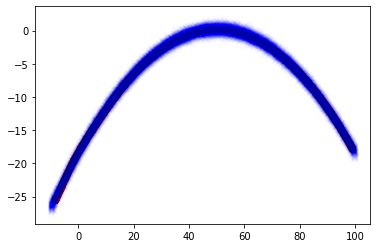

In [32]:
plt.plot(samples_reconstructed[:,0], samples_reconstructed[:,1], 'or', alpha=0.01)

plt.plot(samples[:,0], samples[:,1], 'xb', alpha=0.01)